In [5]:
from qiskit import *
from tqdm import tqdm
from qiskit import quantum_info
from qiskit.quantum_info import DensityMatrix, Statevector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle 
from qiskit_experiments.library import StateTomography
from qiskit.providers.aer import AerSimulator
from qiskit.providers.fake_provider import FakeParis
from numpy.linalg import norm 
import cvxpy
#set noisy simulator backend 
backend = AerSimulator.from_backend(FakeParis())
from qiskit import BasicAer


In [6]:
#DEFINE MATRIX



import numpy as np
def k(theta, alpha):
    return np.sqrt((-1+2*alpha**2 + np.cosh(theta))/(-1+np.cosh(theta)))


def U(theta, alpha):
    
    return np.array([[(1-2*1j*alpha*(1/np.sinh(theta)))/(k(theta,alpha)), 0, 0, (-1j*alpha*(1/np.cosh(theta/2)))/(k(theta,alpha))],
                     
                     [0, ((-4*1j*alpha*(np.cos(0.25*(np.pi+1j*theta)))**2)*(1/np.sinh(theta)))/(k(theta,alpha)),
                      (2*(np.cos(0.25*(np.pi+1j*theta)))**2)*(1/np.cosh(theta/2))/(k(theta,alpha)),0],
                     
                    [0,(2*(1/np.cosh(theta/2))*(np.sin(0.25*(np.pi+1j*theta)))**2)/(k(theta,alpha)),
                     ((-4*1j*alpha*(np.sin(0.25*(np.pi+1j*theta)))**2)*(1/np.sinh(theta)))/(k(theta,alpha)),0],
                     
                    [(1j*alpha*(1/np.cosh(theta/2)))/(k(theta,alpha)),0,0,(-1-2*1j*alpha*(1/np.sinh(theta)))/(k(theta,alpha))]])



In [7]:
theta = 0.5
alpha = 2

fig = plt.figure()
ax = fig.add_subplot()
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), linewidth=1, c='r')
 
# square plot
ax.set_aspect('equal', adjustable='box')
sweep = np.arange(0,2*alpha,0.1)
color = iter(cm.rainbow(np.linspace(0, 1, len(sweep)))
for m in np.arange(0,2*alpha,0.1):
    color = next(cp;prs)
    eigvals, eigvecs = np.linalg.eig(U(theta m*1j,alpha))
    plt.plot(np.real(eigvals), np.imag(eigvals),c=color)
plt.show()

SyntaxError: '(' was never closed (1176998870.py, line 12)

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [03:55<00:00,  2.36s/it]


100


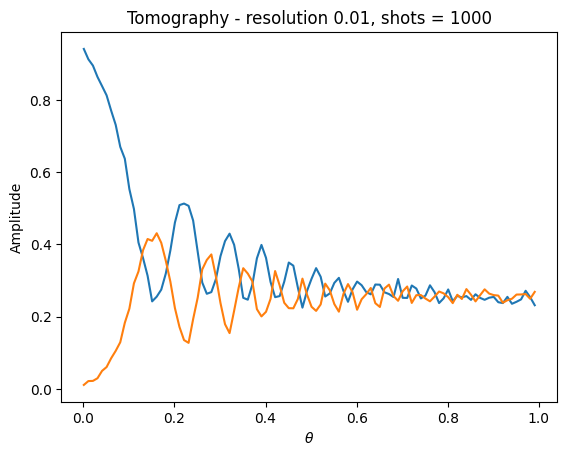

In [9]:
#variables
theta0 = 0.001   #initial theta
theta1 = 1
alpha = 1.5
shots = 1000
#res = 0.1
res_list = np.array([0.01])

#plotting specs
#color = iter(cm.rainbow(np.linspace(0, 1, len(res_list))))
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
#plt.tick_params(labelsize=10) vccf

m = 0


for res in res_list:  
    A = []
    B = []
    #c = next(color)
    theta_sweep=np.arange(theta0, theta1, res) 
    
    
    for a, theta in enumerate(tqdm(theta_sweep)):    
        
        #initialize first time
        qc = QuantumCircuit(2,2)
        v0=np.array([1,0,0,0])
        v1 = np.zeros(4)
        init = U(theta0,alpha)@v0
        init = init.tolist()
        QuantumCircuit.initialize(qc,init,[0,1])
        

        #raise matrix to power a in order to get circuit to update until that specific point of time evolution
        temp = np.linalg.matrix_power(U(res,alpha), a)
        
        #parse circuit and extract result for this point of time evolution
        qc.unitary(temp, [0,1]) 
            
        #measure
        qc.barrier(range(2))
        qc.measure(range(2),range(2))    
        
        
        # QST Experiment
        
        qstexp1 = StateTomography(qc)
        #qstexp1.analysis.set_options(fitter='cvxpy_gaussian_lstsq')
        qstdata1 = qstexp1.run(backend,shots=shots, seed_simulation=100).block_for_results()

        #fitted state extraction
        final_state = qstdata1.analysis_results("state")
        density=np.asarray(final_state.value)
        
        #save state value for plotting 
        A.append(np.abs(density[0,0]))
        B.append(np.abs(density[3,3]))
    
    
    A = np.asarray(A)
    B = np.asarray(B)
    print(len(A))
    # Create a file to store data
   # with open('Ideal Evolution 00 - Trotter step='+str(res)+', shots='+str(shots)+', alpha='+str(alpha)+' .pkl', 'wb') as file:
   #   
   #     # A new file will be created
   #     pickle.dump(A, file)
   # 
   # #same here
   # with open('Ideal Evolution 11 - Trotter step='+str(res)+', shots='+str(shots)+', alpha='+str(alpha)+'.pkl', 'wb') as file:
   #   
   #     
   #     pickle.dump(B, file)


    plt.plot(theta_sweep, A)
    plt.plot(theta_sweep, B)
    plt.xlabel(r'$\theta$')
    plt.ylabel('Amplitude')
    plt.title('Tomography - resolution '+str(res)+', shots = '+str(shots))
    
    
#    #print(len(B[0]))
#    C = np.zeros(len(B))
#    for i in range(len(B)):
#        #print(B[i,:])
#        C[i] = np.average(B[i,:])
#    plt.plot(theta_sweep, C+m,'-', c=c)
#    plt.xlabel(r'$\theta$')
#    plt.ylabel('Amplitude')
#    #plt.title('Time evolution for different Trotter step sizes')
#    m += 1
#
##plt.savefig('/Users/albertozorzato/Desktop/Programming/Code/swag.pdf')
#

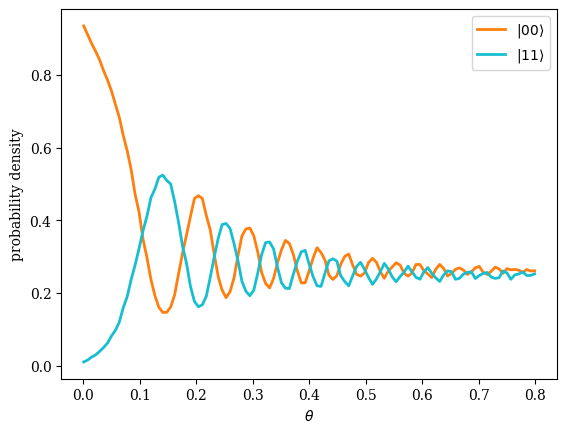

In [70]:
theta0 = 0.001   #initial theta
theta1 = 0.8
res=np.array([0.007])
theta_sweep=np.arange(theta0, theta1, res) 

import pickle
  
# Open the file in binary mode
with open('Ideal Evolution 00 - Trotter step=0.007, shots=8000, alpha=10 .pkl', 'rb') as file:
      
    # Call load method to deserialze
    var00 = pickle.load(file)
  
with open('Ideal Evolution 11 - Trotter step=0.007, shots=8000, alpha=10.pkl', 'rb') as file:
      
    # Call load method to deserialze
    var11 = pickle.load(file)
  

# Define line width and font style
line_width = 2
font_style = 'serif'
palette = sns.color_palette()
line_colors = [palette[1],palette[9]]


# Create plot
fig, ax = plt.subplots()
ax.plot(theta_sweep, var00, linewidth=line_width, color=line_colors[0], label='Line 1')
ax.plot(theta_sweep, var11, linewidth=line_width, color=line_colors[1], label='Line 2')

# Set font style for plot
plt.rcParams['font.family'] = font_style

# Add labels and title
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('probability density')
#ax.set_title('2-qubit Rabi oscillations')

handles, labels = ax.get_legend_handles_labels()
labels[0] = r'$|00\rangle$'
labels[1] = r'$|11\rangle$'
ax.legend(handles, labels)

# Show plot
plt.show()

fig.savefig('poster_plot.pdf')